# Seminar 6

## Recap of random variables

A **random variable** is a function from sample space to the real numbers $X: S \to \mathbb{R}$.

## Recap of distributions

For a random variable $X: S \to \mathbb{R}$, its distribution acts on numbers in $\mathbb{R}$ in the same way as probability function $P$ acts on outcomes.

## Functions describing distributions

- For any distribution we have **cumulative distribution function** (CDF) $F_X(x) = \mathbb{P}(X \leqslant x)$
- For discrete distributions we have **probability mass function** (PMF) $\mathbb{P}_X(x) = \mathbb{P}(X = x)$
- For continuous distributions we have **probability density function** (PDF) $f_X(x) = F'_X(x)$

## Location-scale transformation

Random variables transform like functions, i.e. if $Y = \varphi(X)$, then $Y(\omega) = \varphi(X(\omega))$.

For a $\varphi(x) = ax + b$ and $a > 0$, we have
$$
F_Y(y) = \mathbb{P}(Y \leqslant y) = \mathbb{P}(a X + b \leqslant y) = \mathbb{P}\left(X \leqslant \frac{y - b}{a}\right) = F_X\left(\frac{y - b}{a}\right)
$$

## Mathematical expectation

Mathematical expectation generalizes the concept of mean. Consider probability space $(S, \mathbb{P})$ and discrete random variable $X: S \to \mathbb{R}$. Then expected value of $X$ is then
$$
\mathbb{E}\left[X\right] = \sum_k x_k \mathbb{P}(X = x_k)
$$
    
It may be the case that $\mathbb{E}\left[X\right] = \pm \infty$ or even does not exist.

## Example 1

We roll a die and r.v. $X$ is the score of a roll. What is $\mathbb{E}\left[X\right]$?

## Solution 1

$$
\mathbb{E}\left[X\right] = \sum_{k=1}^6 k \cdot \mathbb{P}(X = k) = \frac16 \sum_{k=1}^6 k = \frac72
$$

## Example 2

We flip a non-symmetric coin and $X$ is the r.v. for heads, $X \sim Be(p)$. What is $\mathbb{E}\left[X\right]$?

## Solution 2

$$
\mathbb{E}\left[X\right] = 0 \cdot \mathbb{P}(X = 0) + 1 \cdot \mathbb{P}(X = 1) = p
$$

## Example 3

Consider discrete r.v. $X$ with distribution $\mathbb{P}(X = 2^n) = 2^{-n}$. What is $\mathbb{E}\left[X\right]$?

## Solution 3

$$
\mathbb{E}\left[X\right] = \sum_{n} 2^n 2^{-n} = \infty
$$

## Example 4

Consider discrete r.v. $X$ with distribution $\mathbb{P}(X = 2^n) = \mathbb{P}(X = - 2^n) = 2^{-n-1}$. What is $\mathbb{E}\left[X\right]$?

## Solution 4

Expectation of r.v. $X$ exists if and only if $\mathbb{E}\left[|X|\right] < \infty$

## Example 5

Consider $X$ with **Poisson distribution** $X \sim Pois(\lambda)$:
$$
\mathbb{P}(X = k) = \frac{\lambda^k}{k!} e^{-\lambda}
$$

What is $\mathbb{E}\left[X\right]$?

## Solution 5

$$
\begin{aligned}
\mathbb{E}\left[X\right] & = \sum_{k=0}^\infty k \frac{\lambda^k}{k!} e^{-\lambda} = e^{-\lambda} \sum_{k=0}^\infty k \frac{\lambda^k}{k!} = e^{-\lambda} \sum_{k=0}^\infty \frac{\lambda^k}{(k - 1)!} = \\
& = e^{-\lambda} \sum_{k=0}^\infty \frac{\lambda^{k-1} \lambda}{(k - 1)!} = \lambda e^{-\lambda} \sum_{j=0}^\infty \frac{\lambda^j}{j!} = \lambda e^{-\lambda} e^\lambda = \lambda
\end{aligned}
$$

## Properties of expectation

Consider r.v.s $X$ and $Y$ with finite expectations. Then,
1. For any constants $a$ and $b$ it holds $\mathbb{E}\left[aX + b\right] = a \mathbb{E}\left[X\right] + b$
2. $\mathbb{E}\left[X + Y\right] = \mathbb{E}\left[X\right] + \mathbb{E}\left[Y\right]$
3. If $X \leqslant Y$ a.s., then $\mathbb{E}\left[X\right] \leqslant \mathbb{E}\left[Y\right]$ ($X \leqslant Y$ a.s. $\Leftrightarrow \mathbb{P}((x, y) : x > y) = 0$)
4. If $X \perp Y$, then $\mathbb{E}\left[XY\right] = \mathbb{E}\left[X\right] \mathbb{E}\left[Y\right]$

## Example 6

Consider $X$ with binomial distribution $X \sim Bi(n, p)$. What is $\mathbb{E}\left[X\right]$?

## Solution 6

- We know that $X = \sum_{k=1}^n X_k$, where $X_k \sim Be(p)$
- We know that $\mathbb{E}\left[X_k\right] = p$
- Then, $\mathbb{E}\left[X\right] = \sum_{k=1}^n \mathbb{E}\left[X_k\right] = np$

In [1]:
import numpy as np
import scipy.stats as sts

import IPython.display as dp
import matplotlib.pyplot as plt
import seaborn as sns

dp.set_matplotlib_formats("retina")
sns.set(style="whitegrid", font_scale=1.5)
sns.despine()

%matplotlib inline

/var/folders/33/j0cl7y453td68qb96j7bqcj4cf41kc/T/ipykernel_28394/2600749600.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  dp.set_matplotlib_formats("retina")


<Figure size 640x480 with 0 Axes>

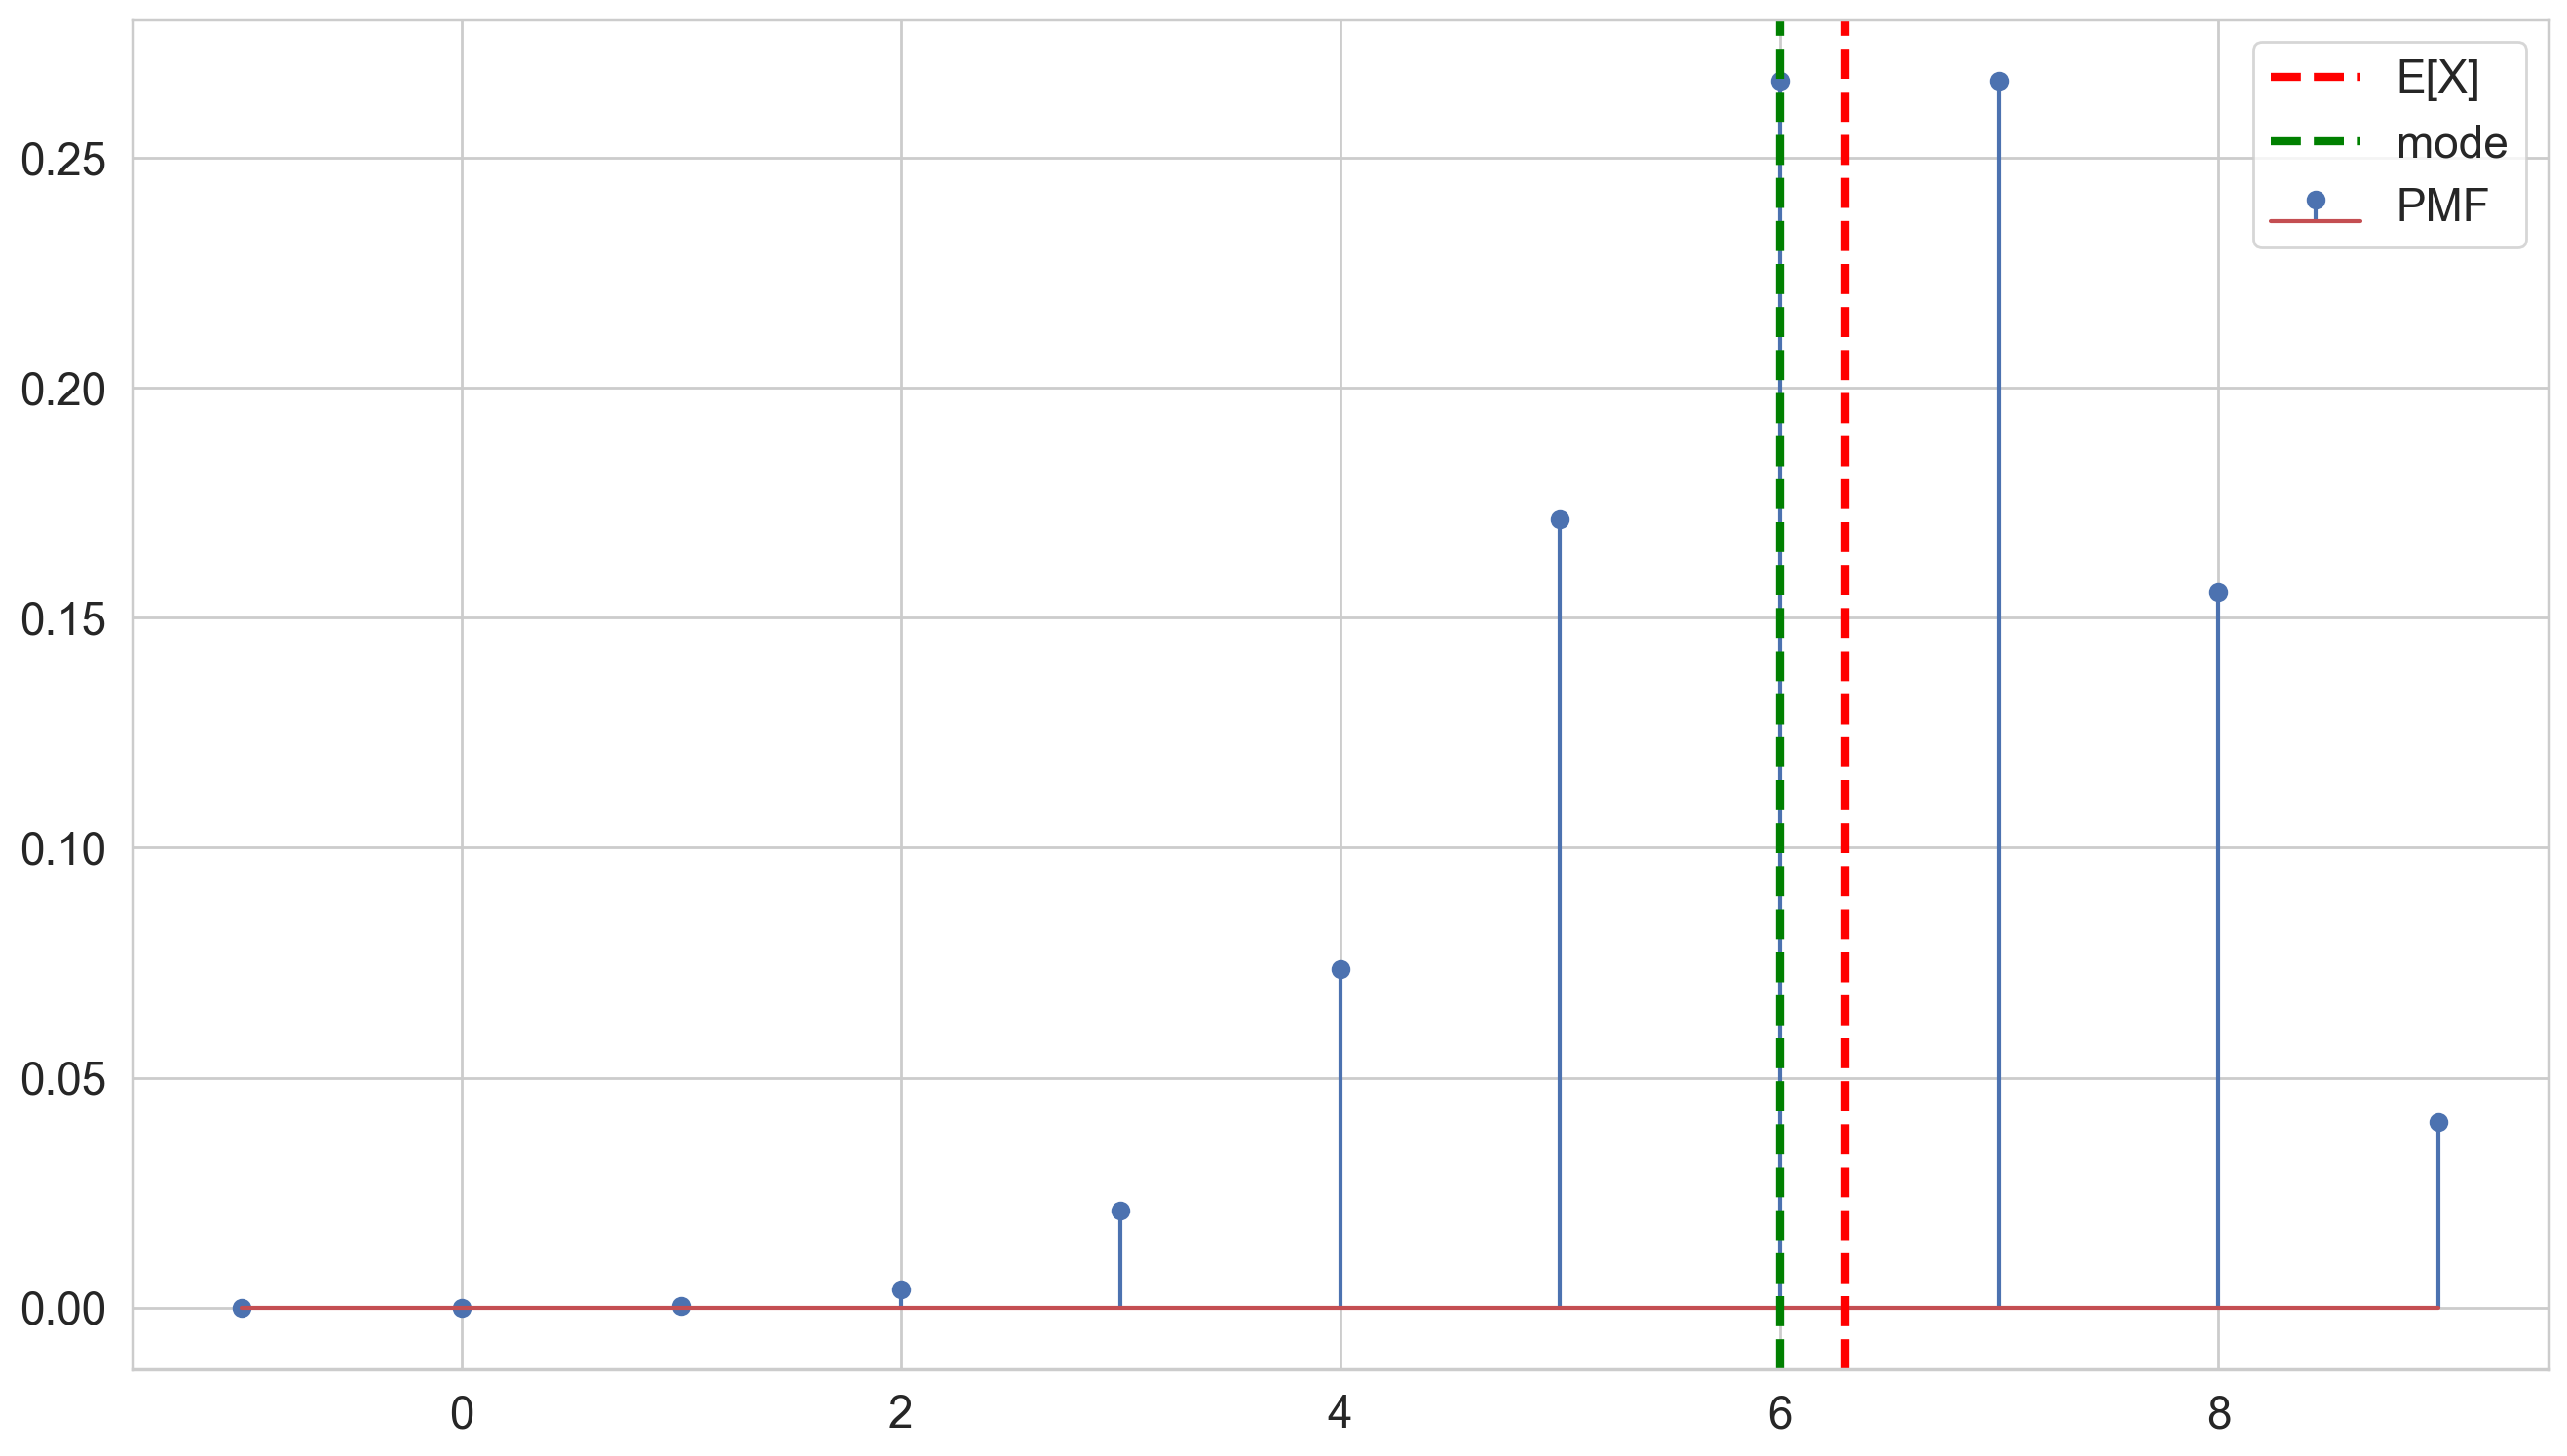

In [2]:
n, p = 9, 0.7
x = np.arange(-1, 10)
y = sts.binom(n, p).pmf(x)

fig, ax = plt.subplots(figsize=(16,9))
ax.stem(x, y, label="PMF")
ax.axvline(n * p, ls="--", linewidth=3, color="red", label="E[X]")
ax.axvline(x[np.argmax(y)], ls="--", linewidth=3, color="green", label="mode")
ax.legend();

## Expectation of a function of a random variable (LOTUS)

Consider discrete r.v. $X$ and $Y = \varphi(X)$, then expectation of $Y$ is
$$
\mathbb{E}\left[Y\right] = \sum_n \varphi(n) \mathbb{P}\left(X = n\right)
$$

## Variance

We call **variance** the following quantity of a r.v. $X$ with finite expectation:
$$
\mathbb{V}\text{ar}(X) = \mathbb{E}\left[\left(X - \mathbb{E}[X]\right)^2\right]
$$

## Example 7

We flip a non-symmetric coin and $X$ is the r.v. for heads, $X \sim Be(p)$. What is $\mathbb{V}\text{ar}\left(X\right)$?

## Solution 7

1. We know the formula
    $$
    \mathbb{V}\text{ar}\left(X\right) = \mathbb{E}\left[\left(X - \mathbb{E}\left[X\right]\right)^2\right]
    $$
2. We know $\mathbb{E}\left[X\right]$
    $$
    \mathbb{V}\text{ar}\left(X\right) = \mathbb{E}\left[\left(X - p\right)^2\right] = \mathbb{E}\left[X^2 - 2 p X + p^2\right]
    $$
3. We know that expectation is linear
    $$
    \mathbb{V}\text{ar}\left(X\right) = \mathbb{E}\left[X^2\right] - 2 p \mathbb{E}\left[X\right] + p^2 = \mathbb{E}\left[X^2\right] - p^2
    $$
4. For $Y = X^2$ we can compute
    $$
    \mathbb{E}\left[Y\right] = 0 \cdot \mathbb{P}(Y = 0) + 1 \cdot \mathbb{P}(Y = 1) = \mathbb{P}(Y = 1) = \mathbb{P}(X^2 = 1) = \mathbb{P}(X = 1) = p
    $$
5. Finally,
    $$
    \mathbb{V}\text{ar}\left(X\right) = p - p^2 = p (1 - p)
    $$

## Properties of variance

1. $\mathbb{V}\text{ar}\left(X\right) \geqslant 0$ and $\mathbb{V}\text{ar}\left(X\right) = 0$ if and only if $X = const$ a.s.
2. If holds
    $$
    \mathbb{V}\text{ar}\left(X\right) = \mathbb{E}\left[X^2\right] - \left(\mathbb{E}\left[X\right]\right)^2
    $$
3. It holds
    $$
    \mathbb{V}\text{ar}\left(aX + b\right) = a^2 \mathbb{V}\text{ar}\left(X\right)
    $$
4. If $X \perp Y$, it holds
$$
\mathbb{V}\text{ar}\left(X + Y\right) = \mathbb{V}\text{ar}\left(X\right) + \mathbb{V}\text{ar}\left(Y\right)
$$

## Example 8

Consider $X$ with binomial distribution $X \sim Bi(n, p)$. What is $\mathbb{V}\text{ar}\left(X\right)$?

## Solution 8

- We know that $X = \sum_{k=1}^n X_k$, where $X_k \sim Be(p)$
- We know that $\mathbb{V}\text{ar}\left(X_k\right) = p(1-p)$
- Then, $\mathbb{V}\text{ar}\left(X\right) = \mathbb{V}\text{ar}\left(\sum_{k=1}^n X_k\right) = \sum_{k=1}^n \mathbb{V}\text{ar}\left(X_k\right) = np(1-p)$

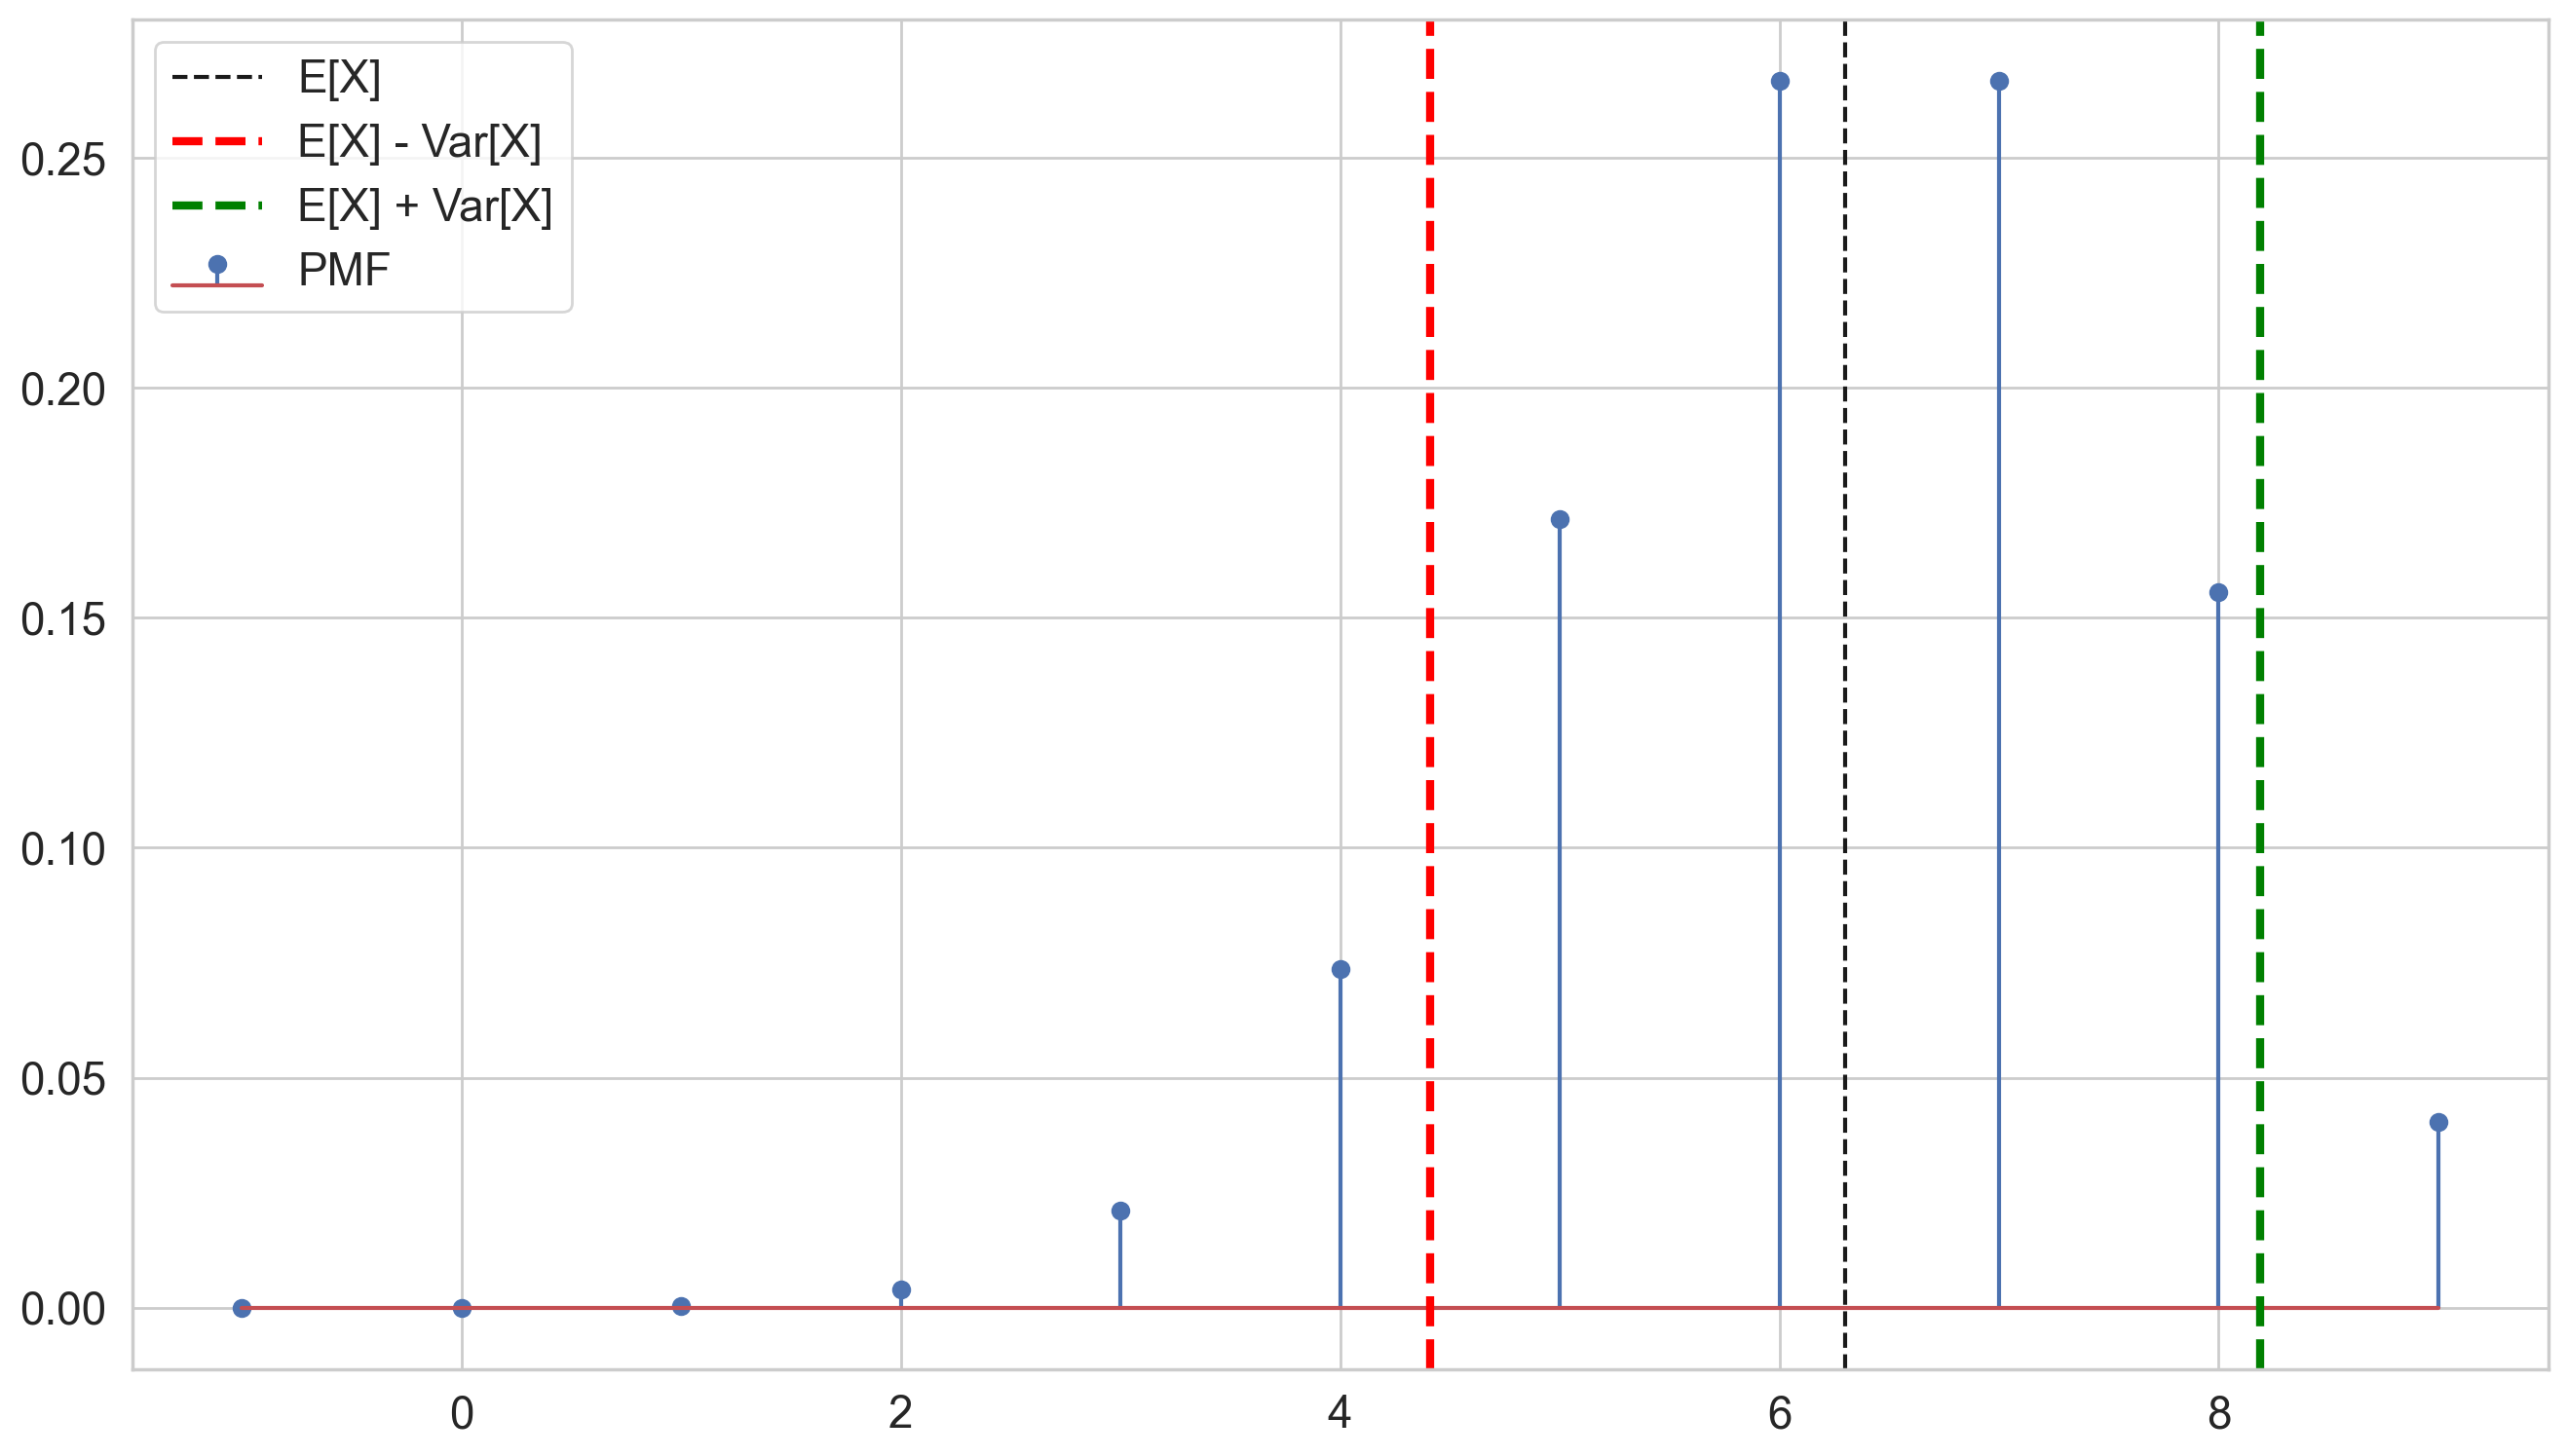

In [3]:
n, p = 9, 0.7
x = np.arange(-1, 10)
y = sts.binom(n, p).pmf(x)

fig, ax = plt.subplots(figsize=(16,9))
ax.stem(x, y, label="PMF")
ax.axvline(n * p, ls="--", color="k", label="E[X]")
ax.axvline(n * p ** 2, ls="--", linewidth=3, color="red", label="E[X] - Var[X]")
ax.axvline(n * p * (2 - p), ls="--", linewidth=3, color="green", label="E[X] + Var[X]")
ax.legend();